# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [93]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [94]:
%pip install --upgrade plotly

### Import Statements

In [110]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
import iso3166 as iso
from datetime import datetime, timedelta

### Notebook Presentation

In [96]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [97]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [98]:
df_data.shape

(4324, 9)

In [99]:
df_data.isna().values.any()

True

In [100]:
df_data.duplicated().values.any()
df_data.isna().sum()
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [101]:
clean_data = df_data.dropna()
clean_data.shape

(964, 9)

In [102]:
# clean_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
clean_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


## Descriptive Statistics

In [103]:
clean_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [104]:
org_count = clean_data.groupby("Organisation").size().to_frame("Launch Count").reset_index()
org_count = org_count.sort_values(by='Launch Count', ascending=False)
org_count.head()


,Organisation,Launch Count
2,CASC,158
14,NASA,149
20,SpaceX,99
21,ULA,98
0,Arianespace,96


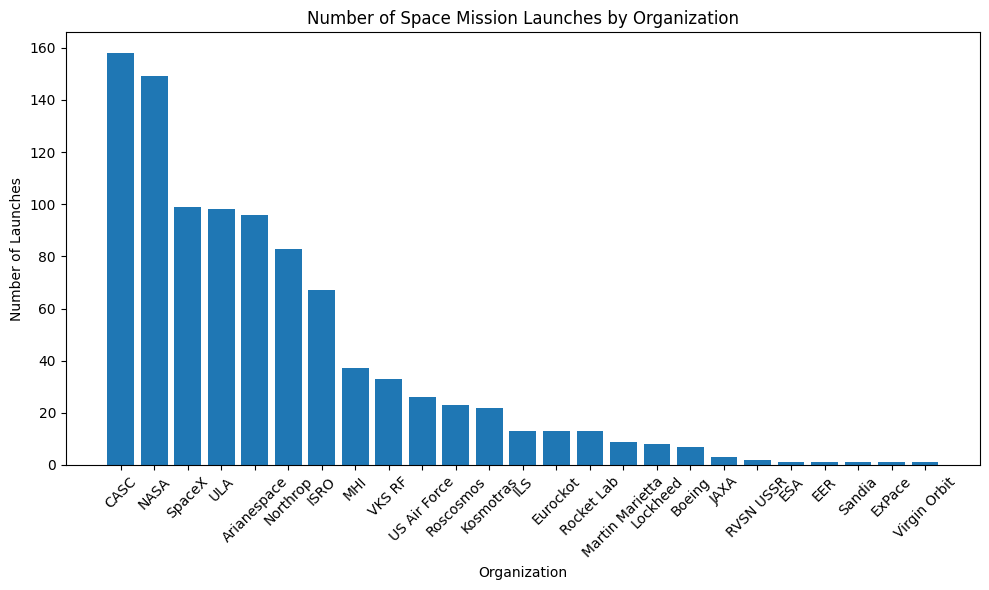

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(org_count['Organisation'], org_count['Launch Count'])
plt.xlabel('Organization')
plt.ylabel('Number of Launches')
plt.title('Number of Space Mission Launches by Organization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [106]:
df = clean_data

active_rockets = df[df['Rocket_Status'].str.contains('Active')].shape[0]
decommissioned_rockets = df[~df['Rocket_Status'].str.contains('Active')].shape[0]

print(f"Active rockets: {active_rockets}")
print(f"Decommissioned rockets: {decommissioned_rockets}")

Active rockets: 586
Decommissioned rockets: 378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [107]:
df = clean_data

successful = df[df['Mission_Status'].str.contains('Success')].shape[0]
unsuccessful = df[~df['Mission_Status'].str.contains('Success')].shape[0]

print(f"Successful rockets: {successful}")
print(f"Unsuccessful rockets: {unsuccessful}")

Successful rockets: 910
Unsuccessful rockets: 54


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [108]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [111]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


# Use a Choropleth Map to Show the Number of Failures by Country


In [113]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

<ipython-input-113-e0f630143b19>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [114]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [116]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()

<ipython-input-116-d639fc0680c5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [117]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


# Chart the Number of Launches per Year

In [118]:
# Converted the date to the datetime object, then extracted the year from the datetime object.
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)
# df_data['year'].head()

# Counted the number of times the same year is mentioned.
ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year',
    'count'
]
# Passing the year and the count to the bar graph.
fig = px.bar(
    ds,
    x='year',
    y="count",
    orientation='v',
    title='Missions number by year'
#     width=800
)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [119]:
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)
# df_data['month'].head()

# Counted the number of times the same month is mentioned.
ds = df_data['month'].value_counts().reset_index()
ds.columns = [
    'month',
    'count'
]
# Passing the year and the count to the bar graph.
fig = px.bar(
    ds,
    x='month',
    y="count",
    orientation='v',
    title='Missions number by month'
#     width=800
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [120]:
# Using max to find the most launches per month
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

# print the month associated with the max value
ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 450


month     12
count    450
dtype: int64

In [121]:
#Using min to find the least launches per month
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 268


month      1
count    268
dtype: int64

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

<ipython-input-122-1a8c49f90caa>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='year'>

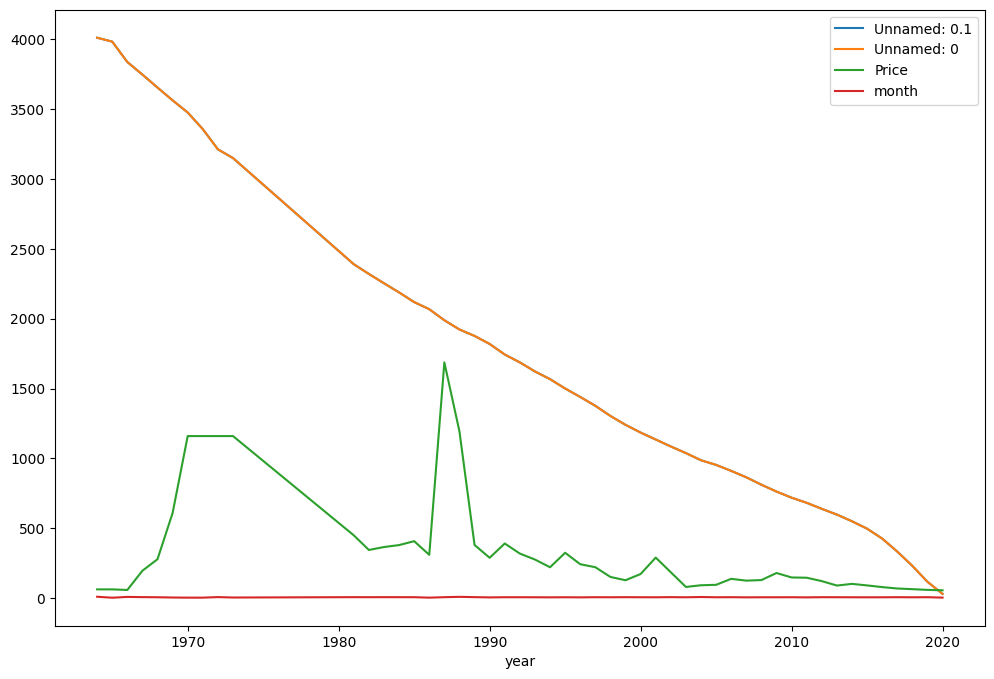

In [122]:
avg_price = df_data[df_data["Price"].notna()]
pd.options.mode.chained_assignment = None
avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)

avg_price.groupby("year").mean().plot(figsize=(12, 8))

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [123]:
# Grab data from Organisations and Locations columns
# Sort through data to find the top 10 Organisations
top_10=pd.DataFrame(columns=df_data.columns)
for val in df_data.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index:
  print(val)
  org=df_data[df_data.Organisation==val]
  top_10=top_10.append(org,ignore_index=False, verify_integrity=False, sort=None)
top_10

df_data[df_data.Organisation=="CASC"]

top_10.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index

# print(top_10.shape)

# Create a chart to display the data
px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation",nbins=10)

RVSN USSR
Arianespace
General Dynamics
CASC
NASA
VKS RF
US Air Force
ULA
Boeing
Martin Marietta


<ipython-input-123-6fec49188730>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-123-6fec49188730>:7: FutureWarning:

Passing non boolean values for sort is deprecated and will error in a future version!

<ipython-input-123-6fec49188730>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-123-6fec49188730>:7: FutureWarning:

Passing non boolean values for sort is deprecated and will error in a future version!

<ipython-input-123-6fec49188730>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-123-6fec49188730>:7: FutureWarning:

Passing non boolean values for sort is deprecated and will error in a future version!

<ipython-input-123-6fec49188730>:7: FutureWarning:

The frame.append m

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [125]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
# Or_df.head()

In [126]:
# Sort years
cold_war_years = Or_df.sort_values("year")

# Grab years from start of dataset (1964) til 1991
cold_war_years[(cold_war_years.year <= 1991)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,1957-10-04 19:28:00+00:00,1957,10
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957-11-03 02:30:00+00:00,1957,11
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957-12-06 16:44:00+00:00,1957,12
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958-02-01 03:48:00+00:00,1958,2
4293,4293,4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA","Thu Dec 18, 1958 23:02 UTC",SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958-12-18 23:02:00+00:00,1958,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1755,1755,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 28, 1991 11:33 UTC",Space Shuttle Discovery | STS-39,StatusRetired,450.0,Success,USA,1991-04-28 11:33:00+00:00,1991,4
1754,1754,1754,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Tue May 14, 1991 15:52 UTC",Atlas-E/F Star-37S-ISS | NOAA-D,StatusRetired,NaN,Success,USA,1991-05-14 15:52:00+00:00,1991,5
1753,1753,1753,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Thu May 16, 1991 21:40 UTC",Tsyklon-3 | Cosmos 2143 to 2148,StatusRetired,NaN,Success,RUS,1991-05-16 21:40:00+00:00,1991,5
1762,1762,1762,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Fri Mar 22, 1991 12:19 UTC",Molniya-M /Block ML | Molniya-3 n†­148,StatusRetired,NaN,Success,RUS,1991-03-22 12:19:00+00:00,1991,3


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [127]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
Or_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020,8
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS,2020-07-30 21:25:00+00:00,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020,7
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,RUS,2020-07-23 14:26:00+00:00,2020,7


([<matplotlib.patches.Wedge at 0x7956487539a0>,
 [Text(-0.36742349695818666, 1.0368220550716587, 'RUS'),
  Text(0.3674233998838983, -1.0368220894723246, 'USA')])

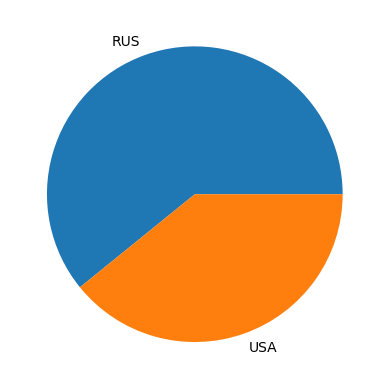

In [128]:
launches = Or_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

colors = ["#1f77b4", "#ff7f0e"]
grouping = Or_df.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

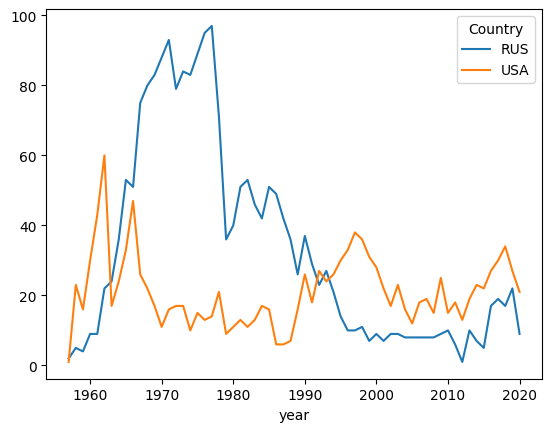

In [129]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
# .size() can be used rather than counts()
Or_df.groupby(["year", "Country"]).size().unstack().plot()

## Chart the Total Number of Mission Failures Year on Year.

In [130]:
Or_df = df_data[df_data['Mission_Status'].str.contains("Failure")]
Or_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
11,11,11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,CHN,2020-07-10 04:17:00+00:00,2020,7
15,15,15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,NZL,2020-07-04 21:19:00+00:00,2020,7
27,27,27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,2020-05-25 19:50:00+00:00,2020,5
36,36,36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,2020-04-09 11:46:00+00:00,2020,4
43,43,43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN,2020-03-16 13:34:00+00:00,2020,3


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [131]:
yearly_failures = px.data.tips()
fig = px.sunburst(Or_df, path=["year", "Mission_Status"])
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [132]:
country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

# group by year, then by country, then find max count
country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

,year,Country,counts
0,1957,RUS,2
1,1957,USA,1
2,1958,USA,23
3,1958,RUS,5
4,1959,USA,16


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [133]:
org_launches = df_data.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

# group by year, then by country, then find max count
org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()

,year,Organisation,counts
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,US Navy,12
3,1958,AMBA,7
4,1958,RVSN USSR,5


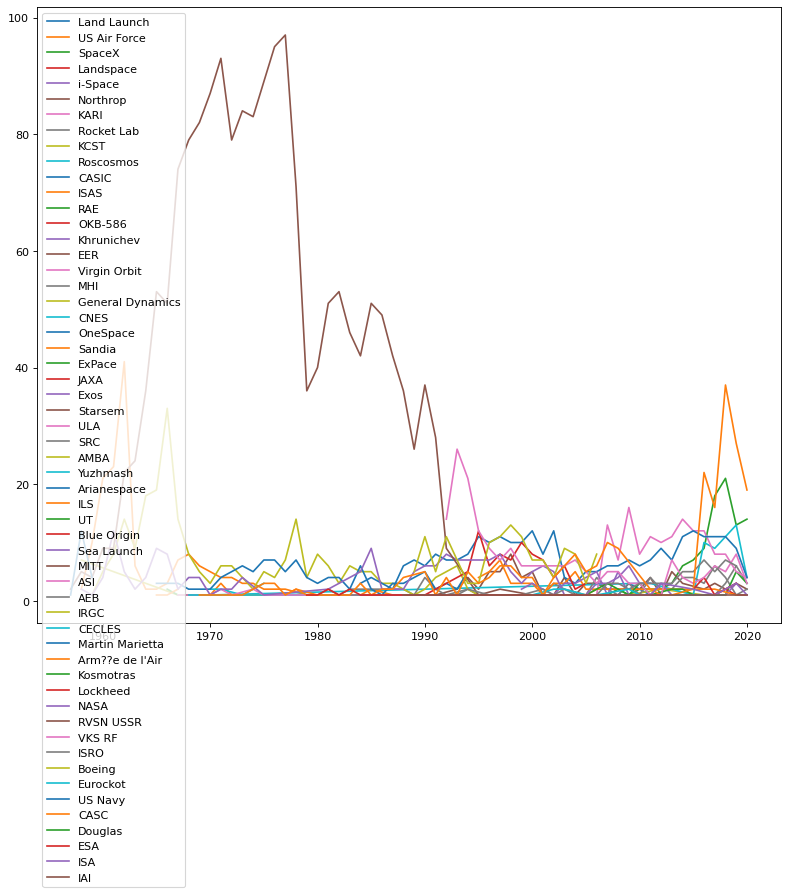

In [134]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)

plt.legend()
plt.show()